<a href="https://colab.research.google.com/github/PitonWuk/WAG/blob/main/module3/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv", index_col='Unnamed: 0')

In [3]:
df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


# Завдання 1
Очистіть дані від викидів, виведіть основні числові характеристики та намалюйте точкову діаграму

              carat         price
count  47039.000000  47039.000000
mean       0.748786   3373.239142
std        0.363406   2837.286360
min        0.300000    544.000000
25%        0.410000   1030.000000
50%        0.700000   2391.000000
75%        1.010000   4851.000000
max        1.700000  13107.000000


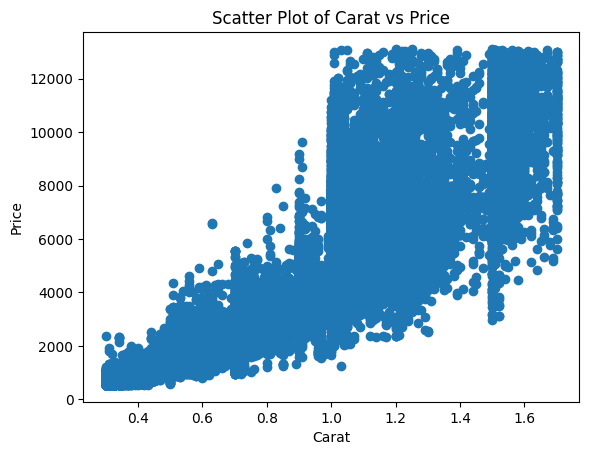

In [6]:
q_low = df.quantile(0.05)
q_high = df.quantile(0.95)


df_filtered = df[(df >= q_low) & (df <= q_high)].dropna()


print(df_filtered.describe())

plt.scatter(df_filtered['carat'], df_filtered['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot of Carat vs Price')
plt.show()

# Завдання 2
Розділіть дані на залежну y та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [7]:
from sklearn.model_selection import train_test_split

X = df_filtered.drop(columns=['price'])
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір тренувальної вибірки (X_train):", X_train.shape)
print("Розмір тренувальної вибірки (y_train):", y_train.shape)
print("Розмір тестової вибірки (X_test):", X_test.shape)
print("Розмір тестової вибірки (y_test):", y_test.shape)

Розмір тренувальної вибірки (X_train): (37631, 1)
Розмір тренувальної вибірки (y_train): (37631,)
Розмір тестової вибірки (X_test): (9408, 1)
Розмір тестової вибірки (y_test): (9408,)


# Завдання 3
Натренуйте модель та виведіть такі метрики: MAE, RMSE, R2

In [8]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df_filtered[['carat']]
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 787.036709204824
Root Mean Squared Error (RMSE): 1174.3302182927264
R-squared (R2): 0.8286718372559516


# Завдання 4
Напишіть рівняння регресії за прикладом:
Бал_літній = 1.02*Бал_зимовий -15.6

In [10]:
import statsmodels.api as sm

X = df['carat']

y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:47:36   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

# Завдання 5 (оптимально)
Додайте в таблицю новий стовпчик carat**2. Знову натренуйте модель та напишіть рівняння регресії. Порівняйте дві моделі за метриками

In [15]:
df['carat_square'] = df['carat'] ** 2

df.head()

,carat,price,carat_square
0,0.23,326,0.0529
1,0.21,326,0.0441
2,0.23,327,0.0529
3,0.29,334,0.0841
4,0.31,335,0.0961


In [17]:
X = df[['carat', 'carat_square']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 953.4600109123119
Root Mean Squared Error (RMSE): 1541.6614463325318
R-squared (R2): 0.8504908655862277
